In [228]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys, os
from typing import Dict, List, NamedTuple, Tuple
from collections import defaultdict
import time


In [229]:
resultsDF = pd.read_csv("../../evaluation/results/result_raw", sep=",", header=0)
#this file should be obtained by running corresponding scripts from https://github.com/LadislavMalecek/UMAP2021
resultsDF.head()

,alg,group_id,user_id,metric,result
0,mf_30_1.0_avg_sim_group_2_AVG,0_1,3456,AR,2.734497
1,mf_30_1.0_avg_sim_group_2_AVG,0_1,3456,nDCG,0.851243
2,mf_30_1.0_avg_sim_group_2_AVG,0_1,5488,AR,2.735564
3,mf_30_1.0_avg_sim_group_2_AVG,0_1,5488,nDCG,0.784615
4,mf_30_1.0_avg_sim_group_2_AVG,1_1,4201,AR,1.704677


In [230]:
def compute_metrics(alg_name, groups, results):
    # test_data are triplets: user_id, item_id, and rating
    #LP: test data is matrix user_id x item_id !!!!!! a ja si rikal, jakto ze ti to prirazeni funguje...

    avg_rating = []
    min_rating = []
    minmax_rating = []
    std_rating = []
    
    avg_nDCG_rating = []
    min_nDCG_rating = []
    minmax_nDCG_rating = []
    std_nDCG_rating = []
        
    for gid in groups:
        gid_res_ndcg = results.loc[(results.group_id == gid)&(results.metric == "nDCG")]
        gid_res_AR = results.loc[(results.group_id == gid)&(results.metric == "AR")] 
        
        #print(gid_res_ndcg)
        #print(gid_res_AR)
        
        group_users_mean_ratings = [i for i in gid_res_AR.result]
        group_users_ndcg_ratings = [i for i in gid_res_ndcg.result]
        
        #print(group_users_mean_ratings)
        if len(group_users_mean_ratings) > 0:
            avg_rating.append(np.average(group_users_mean_ratings)) 
            min = np.min(group_users_mean_ratings)
            min_rating.append(min) 
            max = np.max(group_users_mean_ratings)
            minmax_rating.append(0.0 if max == 0.0 else min/max)
            std_rating.append(np.std(group_users_mean_ratings)) 

            avg_nDCG_rating.append(np.average(group_users_ndcg_ratings)) 
            min = np.min(group_users_ndcg_ratings)
            min_nDCG_rating.append(min) 
            max = np.max(group_users_ndcg_ratings)
            minmax_nDCG_rating.append(0.0 if max == 0.0 else min/max)
            std_nDCG_rating.append(np.std(group_users_ndcg_ratings)) 

    #print(len(avg_rating))    
    results = pd.Series({
       "AR_avg": np.mean(avg_rating) ,
        "AR_min": np.mean(min_rating) ,
        "AR_min/max": np.mean(minmax_rating) ,
        #"AR_std": std_rating ,
        
        "nDCG_avg": np.mean(avg_nDCG_rating) ,
        "nDCG_min": np.mean(min_nDCG_rating) ,
        "nDCG_min/max": np.mean(minmax_nDCG_rating) #,
        #"nDCG_std": std_nDCG_rating 
    })
      
    return results

In [231]:
algs = resultsDF.alg.unique()
groups = resultsDF.group_id.unique()
metrics = resultsDF.metric.unique()

In [232]:
meanResults_all = {}
whitelist = ['GFAR', '_AVG', 'FuzzyDHondtDirectOptimize_1', 'GreedyLM',  'FuzzyDHondt_1',  'SPGreedy',  'fai',  'xpo']
for res in ["resultRaw_coupled_unbiased_0",
            "resultRaw_coupled_unbiased_5",
            "resultRaw_coupled_unbiased_10",
            "resultRaw_coupled_unbiased_15",
            "resultRaw_coupled_unbiased_20",
            "resultRaw_coupled_unbiased_25",
            "resultRaw_coupled_unbiased_30",
            "resultRaw_coupled_unbiased_35",
            "resultRaw_coupled_unbiased_40",
            "resultRaw",
            "resultRaw_coupled"]:
    meanResults_all[res] = {}
    for grouptype in ["sim","div"]:
        meanResults_all[res][grouptype] = {}
        for size in ["2","4","8"]:
            meanResults_all[res][grouptype][size] = {}
            
            fileName = res+"_"+grouptype+"_"+size
            resultsDF = pd.read_csv(fileName, sep=",", header=None, names=["alg","group_id","user_id","metric","result"])
            algs = resultsDF.alg.unique()        
            metrics = resultsDF.metric.unique()
            groups = resultsDF.group_id.unique()        
            meanResults = {}
            for a in algs:
                for item in whitelist:
                    if item in a:
                        resPerAlg = resultsDF.loc[resultsDF.alg == a]            
                        meanResults_all[res][grouptype][size][a] = compute_metrics(a, groups, resPerAlg)

                        print(res,grouptype,size,a)
                        #print(meanResults_all[res][grouptype][size][a])
        

resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_avg_sim_group_2_AVG
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_avg_sim_group_2_FuzzyDHondtDirectOptimize_1.0
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_avg_sim_group_2_FuzzyDHondt_1.0
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_avg_sim_group_2_GFAR_1.0
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_avg_sim_group_2_GreedyLM_1.0
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_avg_sim_group_2_pref_AVG
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_avg_sim_group_2_SPGreedy_1.0
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_fai_sim_group_2
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_xpo_sim_group_2
resultRaw_coupled_unbiased_0 sim 4 mf_30_1.0_avg_sim_group_4_AVG
resultRaw_coupled_unbiased_0 sim 4 mf_30_1.0_avg_sim_group_4_FuzzyDHondtDirectOptimize_1.0
resultRaw_coupled_unbiased_0 sim 4 mf_30_1.0_avg_sim_group_4_FuzzyDHondt_1.0
resultRaw_coupled_unbiased_0 sim 4 mf_30_1.0_avg_sim_group_4_GFAR_1.0
resultRaw_coupled_unbiased_0 sim 4 mf_30_1.0_avg_sim_g

resultRaw_coupled_unbiased_10 sim 2 mf_30_1.0_fai_sim_group_2
resultRaw_coupled_unbiased_10 sim 2 mf_30_1.0_xpo_sim_group_2
resultRaw_coupled_unbiased_10 sim 4 mf_30_1.0_avg_sim_group_4_AVG
resultRaw_coupled_unbiased_10 sim 4 mf_30_1.0_avg_sim_group_4_FuzzyDHondtDirectOptimize_1.0
resultRaw_coupled_unbiased_10 sim 4 mf_30_1.0_avg_sim_group_4_FuzzyDHondt_1.0
resultRaw_coupled_unbiased_10 sim 4 mf_30_1.0_avg_sim_group_4_GFAR_1.0
resultRaw_coupled_unbiased_10 sim 4 mf_30_1.0_avg_sim_group_4_GreedyLM_1.0
resultRaw_coupled_unbiased_10 sim 4 mf_30_1.0_avg_sim_group_4_pref_AVG
resultRaw_coupled_unbiased_10 sim 4 mf_30_1.0_avg_sim_group_4_SPGreedy_1.0
resultRaw_coupled_unbiased_10 sim 4 mf_30_1.0_fai_sim_group_4
resultRaw_coupled_unbiased_10 sim 4 mf_30_1.0_xpo_sim_group_4
resultRaw_coupled_unbiased_10 sim 8 mf_30_1.0_avg_sim_group_8_AVG
resultRaw_coupled_unbiased_10 sim 8 mf_30_1.0_avg_sim_group_8_FuzzyDHondtDirectOptimize_1.0
resultRaw_coupled_unbiased_10 sim 8 mf_30_1.0_avg_sim_group_8_Fuzz

resultRaw_coupled_unbiased_20 sim 4 mf_30_1.0_avg_sim_group_4_GreedyLM_1.0
resultRaw_coupled_unbiased_20 sim 4 mf_30_1.0_avg_sim_group_4_pref_AVG
resultRaw_coupled_unbiased_20 sim 4 mf_30_1.0_avg_sim_group_4_SPGreedy_1.0
resultRaw_coupled_unbiased_20 sim 4 mf_30_1.0_fai_sim_group_4
resultRaw_coupled_unbiased_20 sim 4 mf_30_1.0_xpo_sim_group_4
resultRaw_coupled_unbiased_20 sim 8 mf_30_1.0_avg_sim_group_8_AVG
resultRaw_coupled_unbiased_20 sim 8 mf_30_1.0_avg_sim_group_8_FuzzyDHondtDirectOptimize_1.0
resultRaw_coupled_unbiased_20 sim 8 mf_30_1.0_avg_sim_group_8_FuzzyDHondt_1.0
resultRaw_coupled_unbiased_20 sim 8 mf_30_1.0_avg_sim_group_8_GFAR_1.0
resultRaw_coupled_unbiased_20 sim 8 mf_30_1.0_avg_sim_group_8_GreedyLM_1.0
resultRaw_coupled_unbiased_20 sim 8 mf_30_1.0_avg_sim_group_8_pref_AVG
resultRaw_coupled_unbiased_20 sim 8 mf_30_1.0_avg_sim_group_8_SPGreedy_1.0
resultRaw_coupled_unbiased_20 sim 8 mf_30_1.0_fai_sim_group_8
resultRaw_coupled_unbiased_20 sim 8 mf_30_1.0_xpo_sim_group_8
res

resultRaw_coupled_unbiased_30 sim 8 mf_30_1.0_avg_sim_group_8_FuzzyDHondtDirectOptimize_1.0
resultRaw_coupled_unbiased_30 sim 8 mf_30_1.0_avg_sim_group_8_FuzzyDHondt_1.0
resultRaw_coupled_unbiased_30 sim 8 mf_30_1.0_avg_sim_group_8_GFAR_1.0
resultRaw_coupled_unbiased_30 sim 8 mf_30_1.0_avg_sim_group_8_GreedyLM_1.0
resultRaw_coupled_unbiased_30 sim 8 mf_30_1.0_avg_sim_group_8_pref_AVG
resultRaw_coupled_unbiased_30 sim 8 mf_30_1.0_avg_sim_group_8_SPGreedy_1.0
resultRaw_coupled_unbiased_30 sim 8 mf_30_1.0_fai_sim_group_8
resultRaw_coupled_unbiased_30 sim 8 mf_30_1.0_xpo_sim_group_8
resultRaw_coupled_unbiased_30 div 2 mf_30_1.0_avg_div_group_2_AVG
resultRaw_coupled_unbiased_30 div 2 mf_30_1.0_avg_div_group_2_FuzzyDHondtDirectOptimize_1.0
resultRaw_coupled_unbiased_30 div 2 mf_30_1.0_avg_div_group_2_FuzzyDHondt_1.0
resultRaw_coupled_unbiased_30 div 2 mf_30_1.0_avg_div_group_2_GFAR_1.0
resultRaw_coupled_unbiased_30 div 2 mf_30_1.0_avg_div_group_2_GreedyLM_1.0
resultRaw_coupled_unbiased_30 di

resultRaw_coupled_unbiased_40 sim 8 mf_30_1.0_avg_sim_group_8_SPGreedy_1.0
resultRaw_coupled_unbiased_40 sim 8 mf_30_1.0_fai_sim_group_8
resultRaw_coupled_unbiased_40 sim 8 mf_30_1.0_xpo_sim_group_8
resultRaw_coupled_unbiased_40 div 2 mf_30_1.0_avg_div_group_2_AVG
resultRaw_coupled_unbiased_40 div 2 mf_30_1.0_avg_div_group_2_FuzzyDHondtDirectOptimize_1.0
resultRaw_coupled_unbiased_40 div 2 mf_30_1.0_avg_div_group_2_FuzzyDHondt_1.0
resultRaw_coupled_unbiased_40 div 2 mf_30_1.0_avg_div_group_2_GFAR_1.0
resultRaw_coupled_unbiased_40 div 2 mf_30_1.0_avg_div_group_2_GreedyLM_1.0
resultRaw_coupled_unbiased_40 div 2 mf_30_1.0_avg_div_group_2_pref_AVG
resultRaw_coupled_unbiased_40 div 2 mf_30_1.0_avg_div_group_2_SPGreedy_1.0
resultRaw_coupled_unbiased_40 div 2 mf_30_1.0_fai_div_group_2
resultRaw_coupled_unbiased_40 div 2 mf_30_1.0_xpo_div_group_2
resultRaw_coupled_unbiased_40 div 4 mf_30_1.0_avg_div_group_4_AVG
resultRaw_coupled_unbiased_40 div 4 mf_30_1.0_avg_div_group_4_FuzzyDHondtDirectOpti

resultRaw_coupled div 8 mf_30_1.0_xpo_div_group_8


In [233]:
reformed_dict = {}
for resKey, resDict in meanResults_all.items():
    for groupKey, groupDict in resDict.items():
        for sizeKey, sizeDict in groupDict.items():
            for algKey, values in sizeDict.items():
                reformed_dict[(resKey,groupKey,sizeKey,algKey)] = values

df_res = pd.DataFrame(reformed_dict).T
df_res

AR_avg  \
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_avg_sim_group_2_AVG                       0.008169   
                                   mf_30_1.0_avg_sim_group_2_FuzzyDHondtDirectOpti...  0.008256   
                                   mf_30_1.0_avg_sim_group_2_FuzzyDHondt_1.0           0.007901   
                                   mf_30_1.0_avg_sim_group_2_GFAR_1.0                  0.009507   
                                   mf_30_1.0_avg_sim_group_2_GreedyLM_1.0              0.009068   
...                                                                                         ...   
resultRaw_coupled            div 8 mf_30_1.0_avg_div_group_8_GreedyLM_1.0              0.089777   
                                   mf_30_1.0_avg_div_group_8_pref_AVG                  0.084360   
                                   mf_30_1.0_avg_div_group_8_SPGreedy_1.0              0.091329   
                                   mf_30_1.0_fai_div_group_8                           0.079771   
                                   mf_30_1.0_xpo_div_group_8                           0.087639   

                                                                                         AR_min  \
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_avg_sim_group_2_AVG                       0.004647   
                                   mf_30_1.0_avg_sim_group_2_FuzzyDHondtDirectOpti...  0.004471   
                                   mf_30_1.0_avg_sim_group_2_FuzzyDHondt_1.0           0.004462   
                                   mf_30_1.0_avg_sim_group_2_GFAR_1.0                  0.005720   
                                   mf_30_1.0_avg_sim_group_2_GreedyLM_1.0              0.005419   
...                                                                                         ...   
resultRaw_coupled            div 8 mf_30_1.0_avg_div_group_8_GreedyLM_1.0              0.003500   
                                   mf_30_1.0_avg_div_group_8_pref_AVG                  0.001500   
                                   mf_30_1.0_avg_div_group_8_SPGreedy_1.0              0.004070   
                                   mf_30_1.0_fai_div_group_8                           0.004510   
                                   mf_30_1.0_xpo_div_group_8                           0.004580   

                                                                                       AR_min/max  \
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_avg_sim_group_2_AVG                         0.447170   
                                   mf_30_1.0_avg_sim_group_2_FuzzyDHondtDirectOpti...    0.435372   
                                   mf_30_1.0_avg_sim_group_2_FuzzyDHondt_1.0             0.433452   
                                   mf_30_1.0_avg_sim_group_2_GFAR_1.0                    0.498835   
                                   mf_30_1.0_avg_sim_group_2_GreedyLM_1.0                0.486866   
...                                                                                           ...   
resultRaw_coupled            div 8 mf_30_1.0_avg_div_group_8_GreedyLM_1.0                0.015696   
                                   mf_30_1.0_avg_div_group_8_pref_AVG                    0.007017   
                                   mf_30_1.0_avg_div_group_8_SPGreedy_1.0                0.018079   
                                   mf_30_1.0_fai_div_group_8                             0.023450   
                                   mf_30_1.0_xpo_div_group_8                             0.021258   

                                                                                       nDCG_avg  \
resultRaw_coupled_unbiased_0 sim 2 mf_30_1.0_avg_sim_group_2_AVG                       0.134742   
                                   mf_30_1.0_avg_sim_group_2_FuzzyDHondtDirectOpti...  0.131532   
                                   mf_30_1.0_avg_sim_group_2_FuzzyDHondt_1.0           0.130369   
                                   mf_30_1.0_avg_sim_group_2_GFAR_1.0                  0.145096   
   

In [234]:
df_res.to_csv("results_all_mean.csv")

In [235]:
df_res.index[0]

('resultRaw_coupled_unbiased_0', 'sim', '2', 'mf_30_1.0_avg_sim_group_2_AVG')

In [236]:
df_res.loc[df_res.index.get_level_values(0)=="resultRaw_coupled"].head(50).round(5)

AR_avg  \
resultRaw_coupled sim 2 mf_30_1.0_avg_sim_group_2_AVG                       0.18342   
                        mf_30_1.0_avg_sim_group_2_FuzzyDHondtDirectOpti...  0.16759   
                        mf_30_1.0_avg_sim_group_2_FuzzyDHondt_1.0           0.17762   
                        mf_30_1.0_avg_sim_group_2_GFAR_1.0                  0.20433   
                        mf_30_1.0_avg_sim_group_2_GreedyLM_1.0              0.19829   
                        mf_30_1.0_avg_sim_group_2_pref_AVG                  0.18528   
                        mf_30_1.0_avg_sim_group_2_SPGreedy_1.0              0.18842   
                        mf_30_1.0_fai_sim_group_2                           0.20371   
                        mf_30_1.0_xpo_sim_group_2                           0.20478   
                      4 mf_30_1.0_avg_sim_group_4_AVG                       0.15922   
                        mf_30_1.0_avg_sim_group_4_FuzzyDHondtDirectOpti...  0.14086   
                        mf_30_1.0_avg_sim_group_4_FuzzyDHondt_1.0           0.14863   
                        mf_30_1.0_avg_sim_group_4_GFAR_1.0                  0.17228   
                        mf_30_1.0_avg_sim_group_4_GreedyLM_1.0              0.16956   
                        mf_30_1.0_avg_sim_group_4_pref_AVG                  0.15177   
                        mf_30_1.0_avg_sim_group_4_SPGreedy_1.0              0.16438   
                        mf_30_1.0_fai_sim_group_4                           0.16679   
                        mf_30_1.0_xpo_sim_group_4                           0.17350   
                      8 mf_30_1.0_avg_sim_group_8_AVG                       0.13266   
                        mf_30_1.0_avg_sim_group_8_FuzzyDHondtDirectOpti...  0.11854   
                        mf_30_1.0_avg_sim_group_8_FuzzyDHondt_1.0           0.11605   
                        mf_30_1.0_avg_sim_group_8_GFAR_1.0                  0.14710   
                        mf_30_1.0_avg_sim_group_8_GreedyLM_1.0              0.14006   
                        mf_30_1.0_avg_sim_group_8_pref_AVG                  0.12546   
                        mf_30_1.0_avg_sim_group_8_SPGreedy_1.0              0.13810   
                        mf_30_1.0_fai_sim_group_8                           0.13314   
                        mf_30_1.0_xpo_sim_group_8                           0.14725   
                  div 2 mf_30_1.0_avg_div_group_2_AVG                       0.14596   
                        mf_30_1.0_avg_div_group_2_FuzzyDHondtDirectOpti...  0.09870   
                        mf_30_1.0_avg_div_group_2_FuzzyDHondt_1.0           0.14058   
                        mf_30_1.0_avg_div_group_2_GFAR_1.0                  0.14115   
                        mf_30_1.0_avg_div_group_2_GreedyLM_1.0              0.14024   
                        mf_30_1.0_avg_div_group_2_pref_AVG                  0.13278   
                        mf_30_1.0_avg_div_group_2_SPGreedy_1.0              0.14627   
                        mf_30_1.0_fai_div_group_2                           0.14078   
                        mf_30_1.0_xpo_div_group_2                           0.14112   
                      4 mf_30_1.0_avg_div_group_4_AVG                       0.10745   
                        mf_30_1.0_avg_div_group_4_FuzzyDHondtDirectOpti...  0.08110   
                        mf_30_1.0_avg_div_group_4_FuzzyDHondt_1.0           0.10195   
                        mf_30_1.0_avg_div_group_4_GFAR_1.0                  0.10400   
                        mf_30_1.0_avg_div_group_4_GreedyLM_1.0              0.10513   
                        mf_30_1.0_avg_div_group_4_pref_AVG                  0.09948   
                        mf_30_1.0_avg_div_group_4_SPGreedy_1.0              0.10874   
                        mf_30_1.0_fai_div_group_4                           0.10173   
                        mf_30_1.0_xpo_div_group_4                           0.10406   
                      8 mf_30_1.0_avg_div_group_8_AVG                      

In [237]:
df_res.loc[df_res.index.get_level_values(0)=="resultRaw"].head(50).round(5)

AR_avg  \
resultRaw sim 2 mf_30_1.0_avg_sim_group_2_AVG                       2.82370   
                mf_30_1.0_avg_sim_group_2_FuzzyDHondtDirectOpti...  2.72498   
                mf_30_1.0_avg_sim_group_2_FuzzyDHondt_1.0           2.76333   
                mf_30_1.0_avg_sim_group_2_GFAR_1.0                  2.43848   
                mf_30_1.0_avg_sim_group_2_GreedyLM_1.0              2.64594   
                mf_30_1.0_avg_sim_group_2_pref_AVG                  2.70530   
                mf_30_1.0_avg_sim_group_2_SPGreedy_1.0              2.81096   
                mf_30_1.0_fai_sim_group_2                           2.42496   
                mf_30_1.0_xpo_sim_group_2                           2.44910   
              4 mf_30_1.0_avg_sim_group_4_AVG                       2.38993   
                mf_30_1.0_avg_sim_group_4_FuzzyDHondtDirectOpti...  2.29127   
                mf_30_1.0_avg_sim_group_4_FuzzyDHondt_1.0           2.26119   
                mf_30_1.0_avg_sim_group_4_GFAR_1.0                  1.95708   
                mf_30_1.0_avg_sim_group_4_GreedyLM_1.0              2.28100   
                mf_30_1.0_avg_sim_group_4_pref_AVG                  2.26263   
                mf_30_1.0_avg_sim_group_4_SPGreedy_1.0              2.33451   
                mf_30_1.0_fai_sim_group_4                           1.87973   
                mf_30_1.0_xpo_sim_group_4                           2.00145   
              8 mf_30_1.0_avg_sim_group_8_AVG                       2.02472   
                mf_30_1.0_avg_sim_group_8_FuzzyDHondtDirectOpti...  1.94002   
                mf_30_1.0_avg_sim_group_8_FuzzyDHondt_1.0           1.83314   
                mf_30_1.0_avg_sim_group_8_GFAR_1.0                  1.70513   
                mf_30_1.0_avg_sim_group_8_GreedyLM_1.0              1.91831   
                mf_30_1.0_avg_sim_group_8_pref_AVG                  1.92290   
                mf_30_1.0_avg_sim_group_8_SPGreedy_1.0              1.90462   
                mf_30_1.0_fai_sim_group_8                           1.54581   
                mf_30_1.0_xpo_sim_group_8                           1.71249   
          div 2 mf_30_1.0_avg_div_group_2_AVG                       2.28432   
                mf_30_1.0_avg_div_group_2_FuzzyDHondtDirectOpti...  2.04675   
                mf_30_1.0_avg_div_group_2_FuzzyDHondt_1.0           2.21165   
                mf_30_1.0_avg_div_group_2_GFAR_1.0                  2.00355   
                mf_30_1.0_avg_div_group_2_GreedyLM_1.0              2.14853   
                mf_30_1.0_avg_div_group_2_pref_AVG                  2.12823   
                mf_30_1.0_avg_div_group_2_SPGreedy_1.0              2.27573   
                mf_30_1.0_fai_div_group_2                           1.99844   
                mf_30_1.0_xpo_div_group_2                           2.00514   
              4 mf_30_1.0_avg_div_group_4_AVG                       1.87597   
                mf_30_1.0_avg_div_group_4_FuzzyDHondtDirectOpti...  1.68880   
                mf_30_1.0_avg_div_group_4_FuzzyDHondt_1.0           1.79342   
                mf_30_1.0_avg_div_group_4_GFAR_1.0                  1.54557   
                mf_30_1.0_avg_div_group_4_GreedyLM_1.0              1.79341   
                mf_30_1.0_avg_div_group_4_pref_AVG                  1.74727   
                mf_30_1.0_avg_div_group_4_SPGreedy_1.0              1.84270   
                mf_30_1.0_fai_div_group_4                           1.50519   
                mf_30_1.0_xpo_div_group_4                           1.56892   
              8 mf_30_1.0_avg_div_group_8_AVG                       1.62202   
                mf_30_1.0_avg_div_group_8_FuzzyDHondtDirectOpti...  1.49003   
                mf_30_1.0_avg_div_group_8_FuzzyDHondt_1.0           1.45703   
                mf_30_1.0_avg_div_group_8_GFAR_1.0                  1.38732   
                mf_30_1.0_avg_div_group_8_GreedyLM_1.0              1.55476   

                                       

In [238]:
df_res.loc[df_res.index.get_level_values(0)=="resultRaw_coupled_unbiased_5"].head(50)

AR_avg  \
resultRaw_coupled_unbiased_5 sim 2 mf_30_1.0_avg_sim_group_2_AVG                       0.006821   
                                   mf_30_1.0_avg_sim_group_2_FuzzyDHondtDirectOpti...  0.006936   
                                   mf_30_1.0_avg_sim_group_2_FuzzyDHondt_1.0           0.006599   
                                   mf_30_1.0_avg_sim_group_2_GFAR_1.0                  0.007641   
                                   mf_30_1.0_avg_sim_group_2_GreedyLM_1.0              0.007359   
                                   mf_30_1.0_avg_sim_group_2_pref_AVG                  0.006970   
                                   mf_30_1.0_avg_sim_group_2_SPGreedy_1.0              0.006981   
                                   mf_30_1.0_fai_sim_group_2                           0.007644   
                                   mf_30_1.0_xpo_sim_group_2                           0.007668   
                                 4 mf_30_1.0_avg_sim_group_4_AVG                       0.005301   
                                   mf_30_1.0_avg_sim_group_4_FuzzyDHondtDirectOpti...  0.005532   
                                   mf_30_1.0_avg_sim_group_4_FuzzyDHondt_1.0           0.004860   
                                   mf_30_1.0_avg_sim_group_4_GFAR_1.0                  0.006087   
                                   mf_30_1.0_avg_sim_group_4_GreedyLM_1.0              0.005807   
                                   mf_30_1.0_avg_sim_group_4_pref_AVG                  0.005202   
                                   mf_30_1.0_avg_sim_group_4_SPGreedy_1.0              0.005522   
                                   mf_30_1.0_fai_sim_group_4                           0.005920   
                                   mf_30_1.0_xpo_sim_group_4                           0.006142   
                                 8 mf_30_1.0_avg_sim_group_8_AVG                       0.004020   
                                   mf_30_1.0_avg_sim_group_8_FuzzyDHondtDirectOpti...  0.004122   
                                   mf_30_1.0_avg_sim_group_8_FuzzyDHondt_1.0           0.003485   
                                   mf_30_1.0_avg_sim_group_8_GFAR_1.0                  0.004689   
                                   mf_30_1.0_avg_sim_group_8_GreedyLM_1.0              0.004199   
                                   mf_30_1.0_avg_sim_group_8_pref_AVG                  0.003885   
                                   mf_30_1.0_avg_sim_group_8_SPGreedy_1.0              0.004193   
                                   mf_30_1.0_fai_sim_group_8                           0.004218   
                                   mf_30_1.0_xpo_sim_group_8                           0.004605   
                             div 2 mf_30_1.0_avg_div_group_2_AVG                       0.005235   
                                   mf_30_1.0_avg_div_group_2_FuzzyDHondtDirectOpti...  0.005766   
                                   mf_30_1.0_avg_div_group_2_FuzzyDHondt_1.0           0.005074   
                                   mf_30_1.0_avg_div_group_2_GFAR_1.0                  0.006712   
                                   mf_30_1.0_avg_div_group_2_GreedyLM_1.0              0.006435   
                                   mf_30_1.0_avg_div_group_2_pref_AVG                  0.005466   
                                   mf_30_1.0_avg_div_group_2_SPGreedy_1.0              0.005445   
                                   mf_30_1.0_fai_div_group_2                           0.006702   
                                   mf_30_1.0_xpo_div_group_2                           0.006716   
                                 4 mf_30_1.0_avg_div_group_4_AVG                       0.003554   
                                   mf_30_1.0_avg_div_group_4_FuzzyDHondtDirectOpti...  0.004044   
                                   mf_30_1.0_avg_div_group_4_FuzzyDHondt_1.0           0.003349   
                                   mf_30_1.0_avg_div_group_4_GFAR_1.0                  0.004528   
                              

In [239]:
df_res.loc[df_res.index.get_level_values(0)=="resultRaw_coupled_unbiased_10"].head(50).round(5)

AR_avg  \
resultRaw_coupled_unbiased_10 sim 2 mf_30_1.0_avg_sim_group_2_AVG                       0.00572   
                                    mf_30_1.0_avg_sim_group_2_FuzzyDHondtDirectOpti...  0.00585   
                                    mf_30_1.0_avg_sim_group_2_FuzzyDHondt_1.0           0.00553   
                                    mf_30_1.0_avg_sim_group_2_GFAR_1.0                  0.00616   
                                    mf_30_1.0_avg_sim_group_2_GreedyLM_1.0              0.00599   
                                    mf_30_1.0_avg_sim_group_2_pref_AVG                  0.00582   
                                    mf_30_1.0_avg_sim_group_2_SPGreedy_1.0              0.00581   
                                    mf_30_1.0_fai_sim_group_2                           0.00617   
                                    mf_30_1.0_xpo_sim_group_2                           0.00619   
                                  4 mf_30_1.0_avg_sim_group_4_AVG                       0.00447   
                                    mf_30_1.0_avg_sim_group_4_FuzzyDHondtDirectOpti...  0.00476   
                                    mf_30_1.0_avg_sim_group_4_FuzzyDHondt_1.0           0.00411   
                                    mf_30_1.0_avg_sim_group_4_GFAR_1.0                  0.00496   
                                    mf_30_1.0_avg_sim_group_4_GreedyLM_1.0              0.00483   
                                    mf_30_1.0_avg_sim_group_4_pref_AVG                  0.00440   
                                    mf_30_1.0_avg_sim_group_4_SPGreedy_1.0              0.00462   
                                    mf_30_1.0_fai_sim_group_4                           0.00481   
                                    mf_30_1.0_xpo_sim_group_4                           0.00503   
                                  8 mf_30_1.0_avg_sim_group_8_AVG                       0.00334   
                                    mf_30_1.0_avg_sim_group_8_FuzzyDHondtDirectOpti...  0.00349   
                                    mf_30_1.0_avg_sim_group_8_FuzzyDHondt_1.0           0.00291   
                                    mf_30_1.0_avg_sim_group_8_GFAR_1.0                  0.00376   
                                    mf_30_1.0_avg_sim_group_8_GreedyLM_1.0              0.00343   
                                    mf_30_1.0_avg_sim_group_8_pref_AVG                  0.00325   
                                    mf_30_1.0_avg_sim_group_8_SPGreedy_1.0              0.00341   
                                    mf_30_1.0_fai_sim_group_8                           0.00335   
                                    mf_30_1.0_xpo_sim_group_8                           0.00369   
                              div 2 mf_30_1.0_avg_div_group_2_AVG                       0.00415   
                                    mf_30_1.0_avg_div_group_2_FuzzyDHondtDirectOpti...  0.00483   
                                    mf_30_1.0_avg_div_group_2_FuzzyDHondt_1.0           0.00403   
                                    mf_30_1.0_avg_div_group_2_GFAR_1.0                  0.00550   
                                    mf_30_1.0_avg_div_group_2_GreedyLM_1.0              0.00524   
                                    mf_30_1.0_avg_div_group_2_pref_AVG                  0.00446   
                                    mf_30_1.0_avg_div_group_2_SPGreedy_1.0              0.00433   
                                    mf_30_1.0_fai_div_group_2                           0.00549   
                                    mf_30_1.0_xpo_div_group_2                           0.00551   
                                  4 mf_30_1.0_avg_div_group_4_AVG                       0.00277   
                                    mf_30_1.0_avg_div_group_4_FuzzyDHondtDirectOpti...  0.00331   
                                    mf_30_1.0_avg_div_group_4_FuzzyDHondt_1.0           0.00261   
                                    mf_30_1.0_avg_div_group_4_GFAR_1.0                  0.00362   
                              

In [240]:
df_res.loc[(df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="2")].index.get_level_values(3).unique()

Index(['mf_30_1.0_avg_sim_group_2_AVG',
       'mf_30_1.0_avg_sim_group_2_FuzzyDHondtDirectOptimize_1.0',
       'mf_30_1.0_avg_sim_group_2_FuzzyDHondt_1.0',
       'mf_30_1.0_avg_sim_group_2_GFAR_1.0',
       'mf_30_1.0_avg_sim_group_2_GreedyLM_1.0',
       'mf_30_1.0_avg_sim_group_2_pref_AVG',
       'mf_30_1.0_avg_sim_group_2_SPGreedy_1.0', 'mf_30_1.0_fai_sim_group_2',
       'mf_30_1.0_xpo_sim_group_2'],
      dtype='object')

In [241]:
res_coupled_8 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="8")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_sim_group_8_pref_AVG")].reset_index()
res_decoupled_8 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="8")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_sim_group_8_pref_AVG")].reset_index()

res_coupled_8.corrwith(res_decoupled_8)

AR_avg         -0.318763
AR_min         -0.384199
AR_min/max      0.198752
nDCG_avg       -0.292433
nDCG_min       -0.659778
nDCG_min/max   -0.470596
dtype: float64

In [242]:
res_coupled_2 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="2")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_sim_group_2_pref_AVG")].reset_index()
res_decoupled_2 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="2")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_sim_group_2_pref_AVG")].reset_index()

res_coupled_2.corrwith(res_decoupled_2)

AR_avg         -0.796435
AR_min         -0.603632
AR_min/max      0.730161
nDCG_avg       -0.340549
nDCG_min       -0.497314
nDCG_min/max    0.155283
dtype: float64

In [243]:
res_coupled_4 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="4")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_sim_group_4_pref_AVG")].reset_index()
res_decoupled_4 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="sim")&
          (df_res.index.get_level_values(2)=="4")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_sim_group_4_pref_AVG")].reset_index()

res_coupled_4.corrwith(res_decoupled_4)

AR_avg         -0.541200
AR_min         -0.429242
AR_min/max      0.519584
nDCG_avg       -0.518166
nDCG_min       -0.718602
nDCG_min/max   -0.387222
dtype: float64

In [244]:
res_coupled_2 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="2")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_2_pref_AVG")].reset_index()
res_decoupled_2 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="2")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_2_pref_AVG")].reset_index()

res_coupled_2.corrwith(res_decoupled_2)

AR_avg          0.349552
AR_min          0.318939
AR_min/max      0.903139
nDCG_avg       -0.028751
nDCG_min        0.600838
nDCG_min/max    0.909518
dtype: float64

In [245]:
res_coupled_4 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="4")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_4_pref_AVG")].reset_index()
res_decoupled_4 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="4")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_4_pref_AVG")].reset_index()

res_coupled_4.corrwith(res_decoupled_4)

AR_avg          0.216783
AR_min          0.283504
AR_min/max      0.773400
nDCG_avg       -0.017024
nDCG_min        0.029258
nDCG_min/max    0.780364
dtype: float64

In [246]:
res_coupled_8 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="8")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_8_pref_AVG")].reset_index()
res_decoupled_8 = df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="8")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_8_pref_AVG")].reset_index()

res_coupled_8.corrwith(res_decoupled_8)

AR_avg          0.460319
AR_min          0.253622
AR_min/max      0.617606
nDCG_avg        0.407983
nDCG_min       -0.160386
nDCG_min/max    0.193726
dtype: float64

In [247]:
df_res.loc[(df_res.index.get_level_values(0)=="resultRaw_coupled")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="8")&
          (df_res.index.get_level_values(3)!="mf_30_1.0_avg_div_group_8_pref_AVG")].round(4)

AR_avg  \
resultRaw_coupled div 8 mf_30_1.0_avg_div_group_8_AVG                       0.0912   
                        mf_30_1.0_avg_div_group_8_FuzzyDHondtDirectOpti...  0.0746   
                        mf_30_1.0_avg_div_group_8_FuzzyDHondt_1.0           0.0795   
                        mf_30_1.0_avg_div_group_8_GFAR_1.0                  0.0875   
                        mf_30_1.0_avg_div_group_8_GreedyLM_1.0              0.0898   
                        mf_30_1.0_avg_div_group_8_SPGreedy_1.0              0.0913   
                        mf_30_1.0_fai_div_group_8                           0.0798   
                        mf_30_1.0_xpo_div_group_8                           0.0876   

                                                                            AR_min  \
resultRaw_coupled div 8 mf_30_1.0_avg_div_group_8_AVG                       0.0022   
                        mf_30_1.0_avg_div_group_8_FuzzyDHondtDirectOpti...  0.0036   
                        mf_30_1.0_avg_div_group_8_FuzzyDHondt_1.0           0.0019   
                        mf_30_1.0_avg_div_group_8_GFAR_1.0                  0.0052   
                        mf_30_1.0_avg_div_group_8_GreedyLM_1.0              0.0035   
                        mf_30_1.0_avg_div_group_8_SPGreedy_1.0              0.0041   
                        mf_30_1.0_fai_div_group_8                           0.0045   
                        mf_30_1.0_xpo_div_group_8                           0.0046   

                                                                            AR_min/max  \
resultRaw_coupled div 8 mf_30_1.0_avg_div_group_8_AVG                           0.0098   
                        mf_30_1.0_avg_div_group_8_FuzzyDHondtDirectOpti...      0.0197   
                        mf_30_1.0_avg_div_group_8_FuzzyDHondt_1.0               0.0083   
                        mf_30_1.0_avg_div_group_8_GFAR_1.0                      0.0247   
                        mf_30_1.0_avg_div_group_8_GreedyLM_1.0                  0.0157   
                        mf_30_1.0_avg_div_group_8_SPGreedy_1.0                  0.0181   
                        mf_30_1.0_fai_div_group_8                               0.0234   
                        mf_30_1.0_xpo_div_group_8                               0.0213   

                                                                            nDCG_avg  \
resultRaw_coupled div 8 mf_30_1.0_avg_div_group_8_AVG                         0.1310   
                        mf_30_1.0_avg_div_group_8_FuzzyDHondtDirectOpti...    0.1178   
                        mf_30_1.0_avg_div_group_8_FuzzyDHondt_1.0             0.1143   
                        mf_30_1.0_avg_div_group_8_GFAR_1.0                    0.1342   
                        mf_30_1.0_avg_div_group_8_GreedyLM_1.0                0.1305   
                        mf_30_1.0_avg_div_group_8_SPGreedy_1.0                0.1317   
                        mf_30_1.0_fai_div_group_8                             0.1159   
                        mf_30_1.0_xpo_div_group_8                             0.1273   

                                                                            nDCG_min  \
resultRaw_coupled div 8 mf_30_1.0_avg_div_group_8_AVG                         0.0026   
                        mf_30_1.0_avg_div_group_8_FuzzyDHondtDirectOpti...    0.0040   
                        mf_30_1.0_avg_div_group_8_FuzzyDHondt_1.0             0.0022   
                        mf_30_1.0_avg_div_group_8_GFAR_1.0                    0.0060   
                        mf_30_1.0_avg_div_group_8_GreedyLM_1.0                0.0041   
                        mf_30_1.0_avg_div_group_8_SPGreedy_1.0                0.0049   
                        mf_30_1.0_fai_div_group_8                             0.0052   
                        mf_30_1.0_xpo_div_group_8                             0.0052   

                                                                            nDCG_min/max  
resultRaw_coupled div 8 mf_30_1.0_avg_

In [248]:
df_res.loc[(df_res.index.get_level_values(0)=="resultRaw")&
          (df_res.index.get_level_values(1)=="div")&
          (df_res.index.get_level_values(2)=="8")].round(4)

AR_avg  \
resultRaw div 8 mf_30_1.0_avg_div_group_8_AVG                       1.6220   
                mf_30_1.0_avg_div_group_8_FuzzyDHondtDirectOpti...  1.4900   
                mf_30_1.0_avg_div_group_8_FuzzyDHondt_1.0           1.4570   
                mf_30_1.0_avg_div_group_8_GFAR_1.0                  1.3873   
                mf_30_1.0_avg_div_group_8_GreedyLM_1.0              1.5548   
                mf_30_1.0_avg_div_group_8_pref_AVG                  1.5261   
                mf_30_1.0_avg_div_group_8_SPGreedy_1.0              1.5334   
                mf_30_1.0_fai_div_group_8                           1.2517   
                mf_30_1.0_xpo_div_group_8                           1.3963   

                                                                    AR_min  \
resultRaw div 8 mf_30_1.0_avg_div_group_8_AVG                       0.6555   
                mf_30_1.0_avg_div_group_8_FuzzyDHondtDirectOpti...  0.9537   
                mf_30_1.0_avg_div_group_8_FuzzyDHondt_1.0           0.5645   
                mf_30_1.0_avg_div_group_8_GFAR_1.0                  0.6984   
                mf_30_1.0_avg_div_group_8_GreedyLM_1.0              0.7528   
                mf_30_1.0_avg_div_group_8_pref_AVG                  0.5566   
                mf_30_1.0_avg_div_group_8_SPGreedy_1.0              0.6928   
                mf_30_1.0_fai_div_group_8                           0.6602   
                mf_30_1.0_xpo_div_group_8                           0.6894   

                                                                    AR_min/max  \
resultRaw div 8 mf_30_1.0_avg_div_group_8_AVG                           0.2498   
                mf_30_1.0_avg_div_group_8_FuzzyDHondtDirectOpti...      0.5055   
                mf_30_1.0_avg_div_group_8_FuzzyDHondt_1.0               0.2219   
                mf_30_1.0_avg_div_group_8_GFAR_1.0                      0.3401   
                mf_30_1.0_avg_div_group_8_GreedyLM_1.0                  0.3131   
                mf_30_1.0_avg_div_group_8_pref_AVG                      0.2053   
                mf_30_1.0_avg_div_group_8_SPGreedy_1.0                  0.2884   
                mf_30_1.0_fai_div_group_8                               0.3548   
                mf_30_1.0_xpo_div_group_8                               0.3317   

                                                                    nDCG_avg  \
resultRaw div 8 mf_30_1.0_avg_div_group_8_AVG                         0.4999   
                mf_30_1.0_avg_div_group_8_FuzzyDHondtDirectOpti...    0.4879   
                mf_30_1.0_avg_div_group_8_FuzzyDHondt_1.0             0.4517   
                mf_30_1.0_avg_div_group_8_GFAR_1.0                    0.4489   
                mf_30_1.0_avg_div_group_8_GreedyLM_1.0                0.4866   
                mf_30_1.0_avg_div_group_8_pref_AVG                    0.4706   
                mf_30_1.0_avg_div_group_8_SPGreedy_1.0                0.4612   
                mf_30_1.0_fai_div_group_8                             0.3840   
                mf_30_1.0_xpo_div_group_8                             0.4415   

                                                                    nDCG_min  \
resultRaw div 8 mf_30_1.0_avg_div_group_8_AVG                         0.2763   
                mf_30_1.0_avg_div_group_8_FuzzyDHondtDirectOpti...    0.3606   
                mf_30_1.0_avg_div_group_8_FuzzyDHondt_1.0             0.2381   
                mf_30_1.0_avg_div_group_8_GFAR_1.0                    0.2483   
                mf_30_1.0_avg_div_group_8_GreedyLM_1.0                0.3185   
                mf_30_1.0_avg_div_group_8_pref_AVG                    0.2167   
                mf_30_1.0_avg_div_group_8_SPGreedy_1.0                0.2814   
                mf_30_1.0_fai_div_group_8                             0.2378   
                mf_30_1.0_xpo_div_group_8                             0.2450   

                                                                    nDCG_min/max  


In [249]:
df_tmp = df_res.reset_index(level=3, drop=False, inplace=False)
df_tmp.level_3 = df_tmp.level_3.str.replace("mf_30_1.0_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("mf_230_1.0_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("_1.0","")
df_tmp.level_3 = df_tmp.level_3.str.replace("avg_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("sim_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("div_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("group_2","")
df_tmp.level_3 = df_tmp.level_3.str.replace("group_3","")
df_tmp.level_3 = df_tmp.level_3.str.replace("group_4","")
df_tmp.level_3 = df_tmp.level_3.str.replace("group_8","")
df_tmp.level_3 = df_tmp.level_3.str.replace("_","")
df_tmp.level_3 = df_tmp.level_3.str.replace("FuzzyDHondtDirectOptimize","EP-FuzzDA")
df_tmp.level_3 = df_tmp.level_3.str.replace("FuzzyDHondt","FuzzDA")
df_tmp.level_3 = df_tmp.level_3.str.replace("fai","FAI")
df_tmp.level_3 = df_tmp.level_3.str.replace("xpo","XPO")

df_tmp = df_tmp.loc[(df_tmp.level_3!="prefAVG")&
                  (df_tmp.level_3!="EP-FuzzDAweighted")&
                  (df_tmp.level_3!="FuzzDAweighted")&
                  (df_tmp.level_3!="mfdataFAI")&
                  (df_tmp.level_3!="mfdataXPO")]

df_tmp.level_3.unique()

array(['AVG', 'EP-FuzzDA', 'FuzzDA', 'GFAR', 'GreedyLM', 'SPGreedy',
       'FAI', 'XPO'], dtype=object)

In [250]:
df_renamed = df_tmp.set_index("level_3", append=True)
df_renamed.head(10)

AR_avg    AR_min  AR_min/max  \
                                   level_3                                     
resultRaw_coupled_unbiased_0 sim 2 AVG        0.008169  0.004647    0.447170   
                                   EP-FuzzDA  0.008256  0.004471    0.435372   
                                   FuzzDA     0.007901  0.004462    0.433452   
                                   GFAR       0.009507  0.005720    0.498835   
                                   GreedyLM   0.009068  0.005419    0.486866   
                                   SPGreedy   0.008415  0.004888    0.462878   
                                   FAI        0.009507  0.005721    0.497802   
                                   XPO        0.009532  0.005743    0.499302   
                                 4 AVG        0.006342  0.001747    0.187197   
                                   EP-FuzzDA  0.006501  0.001717    0.176550   

                                              nDCG_avg  nDCG_min  nDCG_min/max  
                                   level_3                                      
resultRaw_coupled_unbiased_0 sim 2 AVG        0.134742  0.079437      0.429130  
                                   EP-FuzzDA  0.131532  0.080333      0.458117  
                                   FuzzDA     0.130369  0.076392      0.415295  
                                   GFAR       0.145096  0.092560      0.497508  
                                   GreedyLM   0.139695  0.088463      0.482549  
                                   SPGreedy   0.137016  0.083552      0.454384  
                                   FAI        0.143080  0.090458      0.495011  
                                   XPO        0.128509  0.080563      0.489187  
                                 4 AVG        0.104643  0.030218      0.172857  
                                   EP-FuzzDA  0.099484  0.031645      0.192974

In [251]:
df_dictionary = {}
for groupKey in df_renamed.index.get_level_values(1).unique():
    for sizeKey in df_renamed.index.get_level_values(2).unique():
        df_tmp = pd.DataFrame({"alg":df_renamed.index.get_level_values(3).unique()})
        df_tmp.set_index("alg", drop=False, inplace=True)
        df_dictionary[(groupKey,sizeKey)] = df_tmp
        
for resKey in df_renamed.index.get_level_values(0).unique():
    for groupKey in df_renamed.index.get_level_values(1).unique():
        for sizeKey in df_renamed.index.get_level_values(2).unique():
            currRes = df_renamed.loc[(df_renamed.index.get_level_values(0)==resKey)&
                  (df_renamed.index.get_level_values(1)==groupKey)&
                  (df_renamed.index.get_level_values(2)==sizeKey)&
                  (df_renamed.index.get_level_values(3)!="prefAVG")&
                  (df_renamed.index.get_level_values(3)!="FuzzyDHondtDirectOptimizeweighted")&
                  (df_renamed.index.get_level_values(3)!="FuzzyDHondtweighted")]
            maxVals = currRes.max() 
            currRes_norm = currRes/maxVals
            currRes_norm.columns = [i+"_"+resKey.replace("resultRaw_","") for i in currRes_norm.columns]
            currRes_norm.reset_index(2, drop=True, inplace=True)
            currRes_norm.reset_index(1, drop=True, inplace=True)
            currRes_norm.reset_index(0, drop=True, inplace=True)
            
            try:
                df_dictionary[(groupKey,sizeKey)] = pd.concat([df_dictionary[(groupKey,sizeKey)], currRes_norm], axis=1)
            except:
                #print(df_dictionary[(groupKey,sizeKey)])
                print(currRes_norm)
            #for i in currRes_norm.columns:  
            #    print(i)
            #    print(df_dictionary[(groupKey,sizeKey)].columns)
            #    df_dictionary[(groupKey,sizeKey)][i] = currRes_norm[i]
            
df_dictionary[("sim","2")]            

,alg,AR_avg_coupled_unbiased_0,AR_min_coupled_unbiased_0,AR_min/max_coupled_unbiased_0,nDCG_avg_coupled_unbiased_0,nDCG_min_coupled_unbiased_0,nDCG_min/max_coupled_unbiased_0,AR_avg_coupled_unbiased_5,AR_min_coupled_unbiased_5,AR_min/max_coupled_unbiased_5,...,AR_min/max_resultRaw,nDCG_avg_resultRaw,nDCG_min_resultRaw,nDCG_min/max_resultRaw,AR_avg_coupled,AR_min_coupled,AR_min/max_coupled,nDCG_avg_coupled,nDCG_min_coupled,nDCG_min/max_coupled
level_3,,,,,,,,,,,,,,,,,,,,,
AVG,AVG,0.857003,0.809191,0.895590,0.928639,0.858216,0.862557,0.889533,0.842566,0.896196,...,0.783683,1.000000,1.000000,0.959038,0.895674,0.740417,0.788619,0.898882,0.782148,0.806815
EP-FuzzDA,EP-FuzzDA,0.866166,0.778564,0.871962,0.906521,0.867904,0.920822,0.904563,0.810235,0.873050,...,1.000000,0.983078,0.973154,0.942409,0.818382,0.814363,0.968349,0.857815,0.820071,0.909358
FuzzDA,FuzzDA,0.828845,0.777025,0.868117,0.898501,0.825324,0.834750,0.860643,0.807583,0.868291,...,0.778992,0.980299,0.976700,0.947213,0.867370,0.713394,0.765571,0.870792,0.753396,0.781237
GFAR,GFAR,0.997315,0.996082,0.999065,1.000000,1.000000,1.000000,0.996475,0.996351,1.000000,...,0.870689,0.890988,0.905960,0.988911,0.997771,0.996769,0.996647,1.000000,1.000000,1.000000
GreedyLM,GreedyLM,0.951325,0.943703,0.975093,0.962775,0.955734,0.969932,0.959714,0.953201,0.974266,...,0.870250,0.959313,0.981178,1.000000,0.968275,0.951094,0.962989,0.949961,0.928944,0.956828
SPGreedy,SPGreedy,0.882789,0.851160,0.927050,0.944310,0.902679,0.913320,0.910408,0.877847,0.925826,...,0.800834,0.969534,0.972682,0.964162,0.920116,0.796666,0.833232,0.926717,0.840897,0.861220
FAI,FAI,0.997375,0.996225,0.996995,0.986104,0.977293,0.994979,0.996842,0.996074,0.997545,...,0.866382,0.852459,0.845489,0.945906,0.994764,0.994199,1.000000,0.988479,0.979129,0.992188
XPO,XPO,1.000000,1.000000,1.000000,0.885682,0.870391,0.983275,1.000000,1.000000,0.998075,...,0.869786,0.825691,0.810890,0.928012,1.000000,1.000000,0.999115,0.865444,0.853249,0.990548


In [256]:
AR_avg = ["AR_avg_coupled"]+["AR_avg_coupled_unbiased_"+i for i in ["5","10","15","20","25","30","35","40"]]+["AR_avg_resultRaw"]
AR_min = [i.replace("AR_avg","AR_min") for i in AR_avg]
AR_minMax = [i.replace("AR_avg","AR_min/max") for i in AR_avg]
ndcg_avg = [i.replace("AR_avg","nDCG_avg") for i in AR_avg]
ndcg_min = [i.replace("AR_avg","nDCG_min") for i in AR_avg]
ndcg_minMax = [i.replace("AR_avg","nDCG_min/max") for i in AR_avg]

metrics = [AR_avg,AR_min,AR_minMax,ndcg_avg,ndcg_min,ndcg_minMax]
#ndcg_minMax

In [285]:
df_dictionary[("sim","2")][ndcg_avg[-2:]].corr(method="kendall")

,nDCG_avg_coupled_unbiased_40,nDCG_avg_resultRaw
nDCG_avg_coupled_unbiased_40,1.000000,0.857143
nDCG_avg_resultRaw,0.857143,1.000000


In [286]:
df_dictionary[("sim","4")][ndcg_avg[-2:]].corr(method="kendall")

,nDCG_avg_coupled_unbiased_40,nDCG_avg_resultRaw
nDCG_avg_coupled_unbiased_40,1.000000,0.285714
nDCG_avg_resultRaw,0.285714,1.000000


In [287]:
df_dictionary[("sim","8")][ndcg_avg[-2:]].corr(method="kendall")

,nDCG_avg_coupled_unbiased_40,nDCG_avg_resultRaw
nDCG_avg_coupled_unbiased_40,1.000000,0.428571
nDCG_avg_resultRaw,0.428571,1.000000


In [289]:
df_dictionary[("sim","2")][ndcg_avg[-2:]].corr(method="pearson")

,nDCG_avg_coupled_unbiased_40,nDCG_avg_resultRaw
nDCG_avg_coupled_unbiased_40,1.000000,0.858836
nDCG_avg_resultRaw,0.858836,1.000000


In [290]:
df_dictionary[("sim","4")][ndcg_avg[-2:]].corr(method="pearson")

,nDCG_avg_coupled_unbiased_40,nDCG_avg_resultRaw
nDCG_avg_coupled_unbiased_40,1.00000,0.26972
nDCG_avg_resultRaw,0.26972,1.00000


In [291]:
df_dictionary[("sim","8")][ndcg_avg[-2:]].corr(method="pearson")

,nDCG_avg_coupled_unbiased_40,nDCG_avg_resultRaw
nDCG_avg_coupled_unbiased_40,1.000000,0.659258
nDCG_avg_resultRaw,0.659258,1.000000


In [257]:
from matplotlib import pyplot as plt
import seaborn as sns

In [258]:
sorted(df_dictionary[("sim","2")].index.tolist())

['AVG', 'EP-FuzzDA', 'FAI', 'FuzzDA', 'GFAR', 'GreedyLM', 'SPGreedy', 'XPO']

<ipython-input-271-02bf9c1c05fa>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-271-02bf9c1c05fa>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-271-02bf9c1c05fa>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',


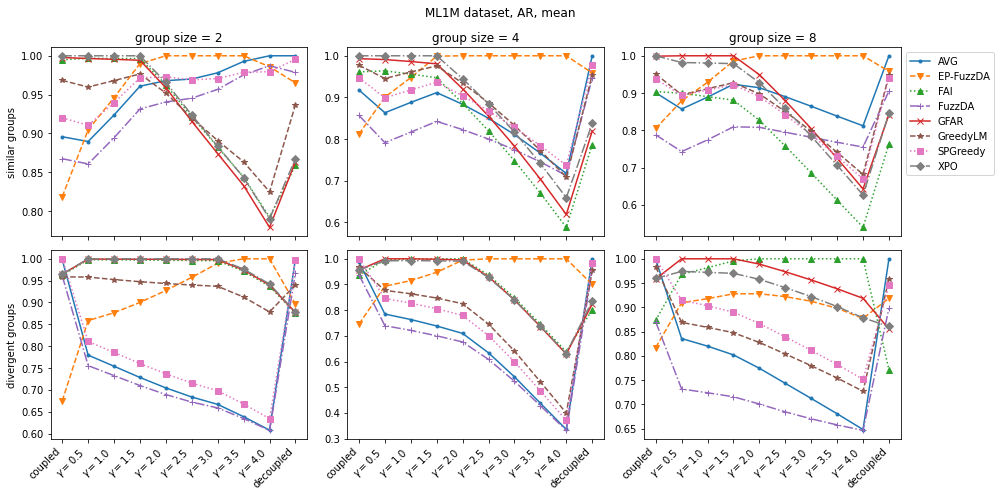

In [271]:
#depict AR_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(2,3,figsize=(14,7),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][AR_avg]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[i,j].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,2].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_title("group size = 2")
ax[0,1].set_title("group size = 4")
ax[0,2].set_title("group size = 8")

ax[0,0].set_ylabel("similar groups")
ax[1,0].set_ylabel("divergent groups")

ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("ML1M dataset, AR, mean")
plt.tight_layout()
plt.savefig("img/AR_avg.png", dpi=300)

<ipython-input-273-10906fba3e06>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-273-10906fba3e06>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-273-10906fba3e06>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',


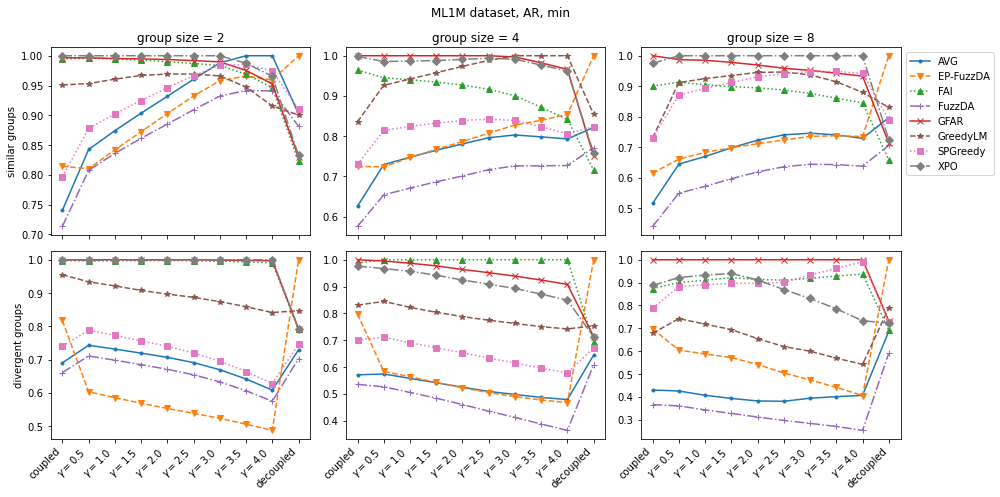

In [273]:
#depict AR_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(2,3,figsize=(14,7),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][AR_min]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[i,j].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,2].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_title("group size = 2")
ax[0,1].set_title("group size = 4")
ax[0,2].set_title("group size = 8")

ax[0,0].set_ylabel("similar groups")
ax[1,0].set_ylabel("divergent groups")

ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("ML1M dataset, AR, min")
plt.tight_layout()
plt.savefig("img/AR_min.png", dpi=300)

<ipython-input-274-c016d84d31bc>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-274-c016d84d31bc>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-274-c016d84d31bc>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',


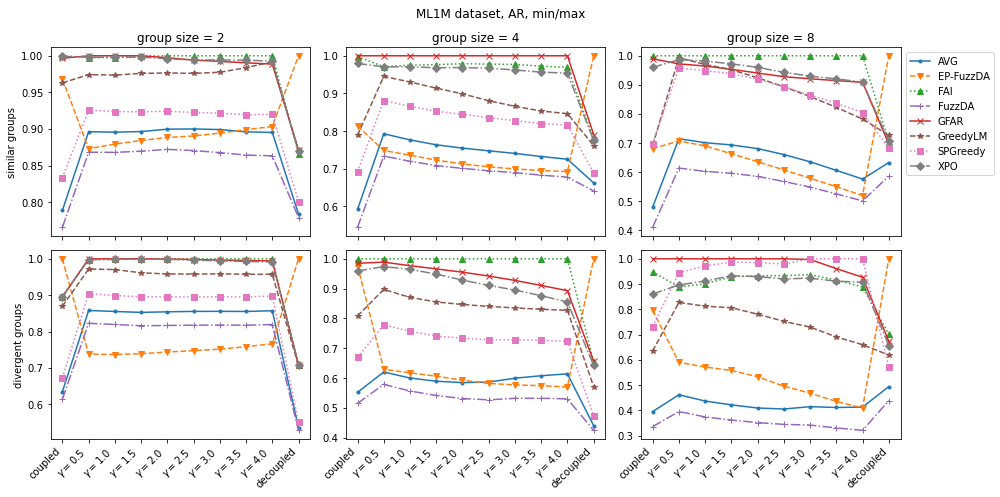

In [274]:
#depict AR_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(2,3,figsize=(14,7),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][AR_minMax]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[i,j].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,2].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_title("group size = 2")
ax[0,1].set_title("group size = 4")
ax[0,2].set_title("group size = 8")

ax[0,0].set_ylabel("similar groups")
ax[1,0].set_ylabel("divergent groups")

ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("ML1M dataset, AR, min/max")
plt.tight_layout()
plt.savefig("img/AR_minMax.png", dpi=300)

<ipython-input-277-7d5f67bbc767>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-277-7d5f67bbc767>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-277-7d5f67bbc767>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',


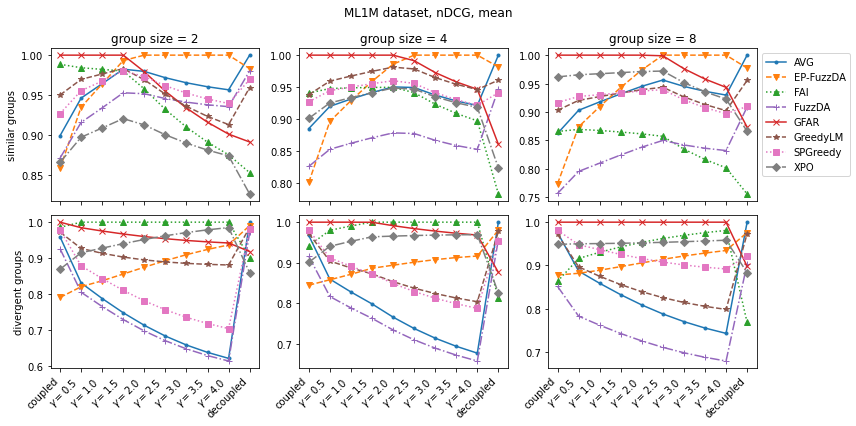

In [277]:
#depict ndcg_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(2,3,figsize=(12,6),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][ndcg_avg]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[i,j].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,2].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_title("group size = 2")
ax[0,1].set_title("group size = 4")
ax[0,2].set_title("group size = 8")

ax[0,0].set_ylabel("similar groups")
ax[1,0].set_ylabel("divergent groups")

ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("ML1M dataset, nDCG, mean")
plt.tight_layout()
plt.savefig("img/ndcg_avg.png", dpi=300)

<ipython-input-276-a43756dfbc97>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-276-a43756dfbc97>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-276-a43756dfbc97>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',


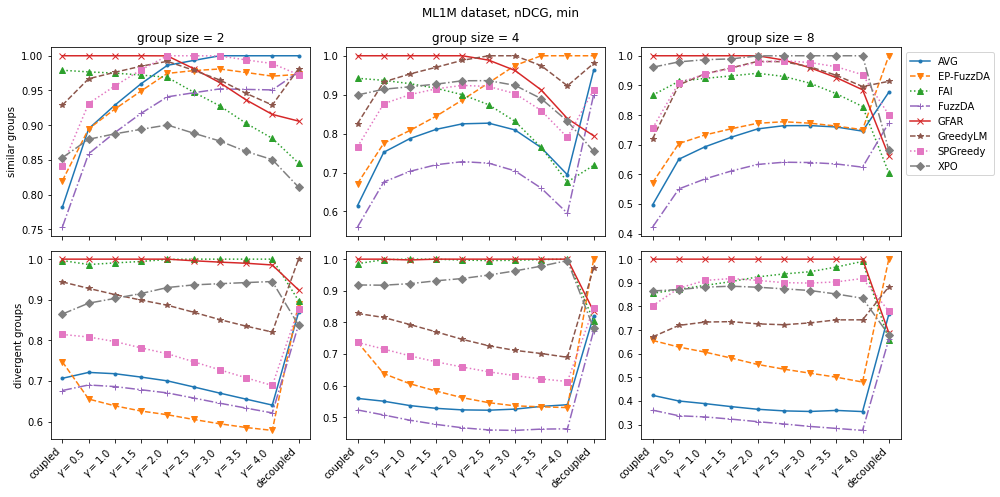

In [276]:
#depict ndcg_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(2,3,figsize=(14,7),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][ndcg_min]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[i,j].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,2].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_title("group size = 2")
ax[0,1].set_title("group size = 4")
ax[0,2].set_title("group size = 8")

ax[0,0].set_ylabel("similar groups")
ax[1,0].set_ylabel("divergent groups")

ax[1,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[1,2].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("ML1M dataset, nDCG, min")
plt.tight_layout()
plt.savefig("img/ndcg_min.png", dpi=300)

<ipython-input-266-5655078755ff>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
<ipython-input-266-5655078755ff>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',


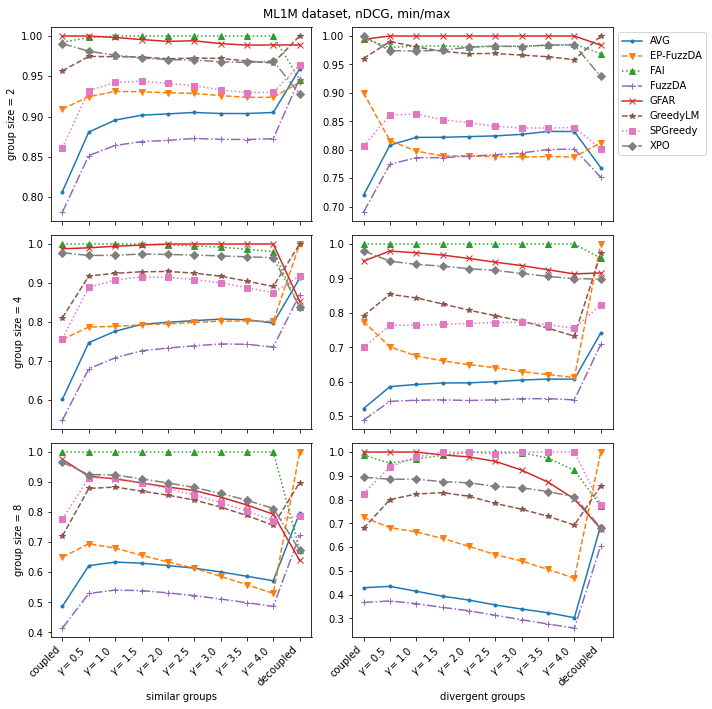

In [266]:
#depict ndcg_avg
linestyles = ["-","--",":","-.","-","--",":","-."]
markers = [".","v","^","+","x","*","s","D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,ax = plt.subplots(3,2,figsize=(10,10),sharex=True)
i =0
for sim in ["sim","div"]:
    j = 0
    for size in ["2","4","8"]:               
        vals = df_dictionary[(sim,size)][ndcg_minMax]
        k = 0
        for a in sorted(vals.index.tolist()):
            ax[j,i].plot(vals.loc[a], marker=markers[k], linestyle=linestyles[k], color=colors[k], label=a)
            k += 1
        #sns.lineplot(data=vals.T, ax=ax[j,i], legend=False)
        j += 1
    i += 1
    
ax[0,1].legend(bbox_to_anchor=(1.0, 1.0))
ax[0,0].set_ylabel("group size = 2")
ax[1,0].set_ylabel("group size = 4")
ax[2,0].set_ylabel("group size = 8")

ax[2,0].set_xlabel("similar groups")
ax[2,1].set_xlabel("divergent groups")

ax[2,0].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
ax[2,1].set_xticklabels(["coupled",r'$\gamma = 0.5$',r'$\gamma = 1.0$',
                    r'$\gamma = 1.5$',r'$\gamma = 2.0$',r'$\gamma = 2.5$',r'$\gamma = 3.0$',
                    r'$\gamma = 3.5$',r'$\gamma = 4.0$',"decoupled"],
                       rotation = 45, ha="right")
fig.suptitle("ML1M dataset, nDCG, min/max")
plt.tight_layout()
plt.savefig("img/ndcg_minMax.png", dpi=300)

In [292]:
df_dictionary[("div","2")][ndcg_avg[-2:]].corr(method="kendall")

,nDCG_avg_coupled_unbiased_40,nDCG_avg_resultRaw
nDCG_avg_coupled_unbiased_40,1.000000,-0.428571
nDCG_avg_resultRaw,-0.428571,1.000000


In [293]:
df_dictionary[("div","4")][ndcg_avg[-2:]].corr(method="kendall")

,nDCG_avg_coupled_unbiased_40,nDCG_avg_resultRaw
nDCG_avg_coupled_unbiased_40,1.000000,-0.571429
nDCG_avg_resultRaw,-0.571429,1.000000


In [294]:
df_dictionary[("div","8")][ndcg_avg[-2:]].corr(method="kendall")

,nDCG_avg_coupled_unbiased_40,nDCG_avg_resultRaw
nDCG_avg_coupled_unbiased_40,1.000000,-0.428571
nDCG_avg_resultRaw,-0.428571,1.000000
